<a href="https://colab.research.google.com/github/Mateus929/cifar10-score-diffusion/blob/main/notebooks/score_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This section contains setup code specific to running the notebook on Google Colab. This code depends on the environment and may need to be adjusted based on your specific setup.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/Mateus929/cifar10-score-diffusion.git

%cd cifar10-score-diffusion

In [3]:
%%capture
from google.colab import userdata
wandb_api_login = userdata.get('WANDB_API_LOGIN')
! pip install -r requirements.txt
! wandb login {wandb_api_login}

In [4]:
import os
os.environ["BASE_WORK_DIR"] = "/content/drive/MyDrive/score_diffusion"

# Sample Run

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-score-net",
    # "run_id": None,

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 50.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 10,  # Higher steps = better quality but slower
    "step_size_factor": 2e-5,  # Controls the Langevin step magnitude

    # Checkpointing
    "save_every": 5,
    "resume_training": False,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
train_dsm.train_dsm(config)

Current run id:  ed57facd


wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 170M/170M [00:19<00:00, 8.67MB/s]


Starting training from epoch  0
0/100, loss: 69077607564521.086
1/100, loss: 75819438093786.03
2/100, loss: 74898690632209.02
3/100, loss: 69760418713694.28
4/100, loss: 66308505812614.875
5/100, loss: 65319322740929.8
6/100, loss: 67823627360355.516
7/100, loss: 68812331508612.914
8/100, loss: 68159318449191.28
9/100, loss: 62073503190799.06
10/100, loss: 65508749594676.375
11/100, loss: 55287045204371.31
12/100, loss: 68891279179231.266
13/100, loss: 80124135093763.92
14/100, loss: 71800875852048.38
15/100, loss: 65212496176926.77
16/100, loss: 65591823229996.52
17/100, loss: 67331071144847.38
18/100, loss: 68389449703025.92
19/100, loss: 64682722367398.95
20/100, loss: 66862295839526.63
21/100, loss: 60619661642403.68
22/100, loss: 73180481036455.61
23/100, loss: 65247623232572.234
24/100, loss: 67198907384227.03
25/100, loss: 60361189388528.94
26/100, loss: 66804650652098.45
27/100, loss: 66024443283209.82
28/100, loss: 78970647581185.31
29/100, loss: 67621952963607.57
30/100, loss

100%|██████████| 79/79 [51:24<00:00, 39.04s/it]


Calculating FID and IS scores...
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 139MB/s] 
FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.10it/s]


Train: {'FID': 473.00478527262595, 'IS_MEAN': 1.2629188299179077, 'IS_STD': 0.009402861818671227}
Test: {'FID': 473.00478527262595, 'IS_MEAN': 1.2629188299179077, 'IS_STD': 0.009402861818671227}


epoch/epoch,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇█████
epoch/loss,▆▅▄▃▄▃▁▄▇▅▄▂▃▆▄▃▄▅▃▃▃▃▅▄▃▄▆▆▂▄▃▅▂▂▃▅▄▆█▄
metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,71927695731636.05
metrics/fid_test,473.00479


ScoreNet(
  (temb_dense0): Linear(in_features=128, out_features=512, bias=True)
  (temb_dense1): Linear(in_features=512, out_features=512, bias=True)
  (temb_proj): Linear(in_features=512, out_features=128, bias=True)
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(128, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn1): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn2): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn3): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn4): GroupNorm(8, 128, eps=1e-05, affine=True)
)

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v2-score-net",
    # "run_id": None,

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 50.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 10,  # Higher steps = better quality but slower
    "step_size_factor": 2e-5,  # Controls the Langevin step magnitude

    # Checkpointing
    "save_every": 5,
    "resume_training": False,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
train_dsm.train_dsm(config)

NEW TRAINING
Current run id:  71698bcc


wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training from epoch  0
0/100, loss: 9862.413376908167
1/100, loss: 2383.6670621203643
2/100, loss: 1772.8209319053708
3/100, loss: 1522.7114685526894
4/100, loss: 1446.8378500389626
5/100, loss: 1423.5253253751398
6/100, loss: 1291.8609210158247
7/100, loss: 1443.7324968030691
8/100, loss: 1203.6018487876638
9/100, loss: 1161.0248108690657
10/100, loss: 1035.9200603358277
11/100, loss: 974.7092895507812
12/100, loss: 884.7487177934183
13/100, loss: 863.8934958377457
14/100, loss: 732.7756549025436
15/100, loss: 756.3744873671276
16/100, loss: 735.7665642545657
17/100, loss: 668.7417248191736
18/100, loss: 696.1197050831202
19/100, loss: 643.2978337670836
20/100, loss: 621.6060270421646
21/100, loss: 650.2786811379825
22/100, loss: 600.340513263517
23/100, loss: 743.8936936946781
24/100, loss: 561.2093146048543
25/100, loss: 555.5110554804887
26/100, loss: 563.6821922829084
27/100, loss: 580.1343723306875
28/100, loss: 512.3329709728661
29/100, loss: 564.3434240628997
30/100, l

100%|██████████| 79/79 [51:23<00:00, 39.03s/it]


Calculating FID and IS scores...


FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.10it/s]


Train: {'FID': 497.37125100120664, 'IS_MEAN': 1.2519344091415405, 'IS_STD': 0.007916275411844254}
Test: {'FID': 497.29765009211013, 'IS_MEAN': 1.2519344091415405, 'IS_STD': 0.007916275411844254}


epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇████
epoch/loss,██▇█▆▄▄▄▃▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,258.09445
metrics/fid_test,497.29765


ScoreNet(
  (temb_dense0): Linear(in_features=128, out_features=512, bias=True)
  (temb_dense1): Linear(in_features=512, out_features=512, bias=True)
  (temb_proj): Linear(in_features=512, out_features=128, bias=True)
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(128, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gn1): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn2): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn3): GroupNorm(8, 128, eps=1e-05, affine=True)
  (gn4): GroupNorm(8, 128, eps=1e-05, affine=True)
)

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v3-score-net",
    "run_id": "81b10612",

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 2e-4,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 30.0,  # Large enough to cover the data distribution diameter
    "T": 1.0,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "num_eval_images": 5000,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 50,  # Higher steps = better quality but slower
    "step_size_factor": 1e-5,  # Controls the Langevin step magnitude
    "num_slices": 50,

    # Checkpointing
    "save_every": 5,
    "resume_training": True,

    #Model

    "model_name": "score-net"
}

from train import train_dsm
model = train_dsm.train_dsm(config)

Current run id:  81b10612


epoch/epoch,99
epoch/loss,261.47805


Starting training from epoch  100
Generating 5000 images using DSM Langevin...


100%|██████████| 40/40 [1:02:20<00:00, 93.51s/it]


Calculating FID and IS scores...
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 132MB/s]
FID/IS Progress: 100%|██████████| 40/40 [00:18<00:00,  2.21it/s]


Train: {'FID': 498.0105842252826, 'IS_MEAN': 1.257665753364563, 'IS_STD': 0.006725211162120104}
Test: {'FID': 497.91948318463443, 'IS_MEAN': 1.257665753364563, 'IS_STD': 0.006725211162120104}


metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,99
epoch/loss,261.47805
metrics/fid_test,497.91948
metrics/fid_train,498.01058
metrics/is_test_mean,1.25767


Generating 4 images using DSM Langevin...


100%|██████████| 1/1 [02:04<00:00, 124.88s/it]


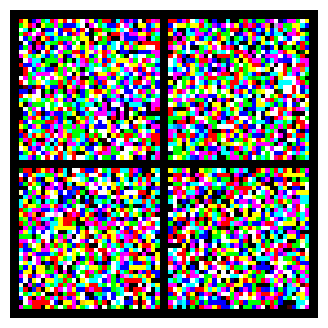

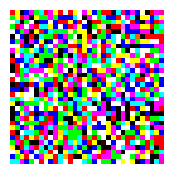

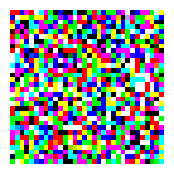

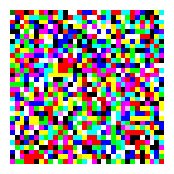

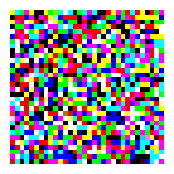

In [ ]:
from generators.dsm_sampler import dsm_sampler

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma_min": 0.01,
    "sigma_max": 30.0,
    "T": 1.0,
    "num_eval_images": 4,
    "n_steps_per_sigma": 1000,  # 100 is the "Golden Standard" for convergence
    "num_slices": 100,         # 100 slices provides a very smooth annealing ramp
    "step_size_factor": 2e-5,  # Slightly higher than 1e-5 to ensure movement
}



fake_images = dsm_sampler(model, config, device)
images = (fake_images + 1) / 2.0  # [-1,1] -> [0,1]
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0))  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-ncsn",
    "run_id": "5daa3db2",

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    # Noise Schedule (VE-SDE Specific)
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 1,  # Large enough to cover the data distribution diameter
    "L": 10,  # Max time horizon

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": False,
    "num_eval_images": 4,  # Start small to save time, increase to 10k/50k for final FID
    "n_steps_per_sigma": 100,  # Higher steps = better quality but slower
    "step_size_factor": 0.00002,

    # Checkpointing
    "save_every": 5,
    "resume_training": True,

    #Model

    "model_name": "score-net"
}

from train import train_ncsn
model = train_ncsn.train_ncsn(config)

Current run id:  5daa3db2


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 170M/170M [00:09<00:00, 17.9MB/s]


Starting training from epoch  60
60/100, loss: 0.37776756423818486
61/100, loss: 0.36441307131896544
62/100, loss: 0.35242170575634596
63/100, loss: 1.7708261651455345e+18
64/100, loss: 18351291758.649616
65/100, loss: 503629960.96163684
66/100, loss: 287791916.2966752
67/100, loss: 176149699.77493605
68/100, loss: 118126195.51918158
69/100, loss: 90733447.96930946
70/100, loss: 74863933.39130434
71/100, loss: 64092414.57800511
72/100, loss: 54221644.88491049
73/100, loss: 46521923.04859335
74/100, loss: 39236858.35294118
75/100, loss: 34733379.35038363
76/100, loss: 30099796.18925831
77/100, loss: 26230965.72634271
78/100, loss: 22938507.31713555
79/100, loss: 20286100.94629156
80/100, loss: 17856834.984654732
81/100, loss: 15360361.930946292
82/100, loss: 13882925.506393861
83/100, loss: 12710940.099744245
84/100, loss: 11147726.319693094
85/100, loss: 9412614.911764706
86/100, loss: 8238603.720588235
87/100, loss: 7336370.7506393865
88/100, loss: 6497309.06713555
89/100, loss: 59938

epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/loss,▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/epoch,99
epoch/loss,4782729.29763


In [ ]:
import torch
from tqdm import tqdm
import numpy as np


@torch.no_grad()
def nscn_sampler(model, config, device):
    model.eval()

    sigma_min = config["sigma_min"]
    sigma_max = config["sigma_max"]
    n_steps_per_sigma = config["n_steps_per_sigma"]
    L = config.get("L", 10)
    step_size_factor = config.get("step_size_factor", 2e-5)

    sigmas = torch.tensor(
        sigma_max * (sigma_min / sigma_max) ** (np.arange(L) / (L - 1)),
        dtype=torch.float32,
        device=device
    )

    num_images = config.get("num_eval_images", 10000)
    batch_size = config.get("batch_size", 128)

    fake_images = []

    print(f"Generating {num_images} images using DSM Langevin...")

    for _ in tqdm(range(0, num_images, batch_size)):
        cur_bs = min(batch_size, num_images - len(fake_images) * batch_size)

        x = torch.randn(cur_bs, 3, 32, 32, device=device) * sigmas[0]

        for level in range(0, L):
            step_size = step_size_factor * ((sigmas[level] / sigma_min) ** 2)
            for _ in range(n_steps_per_sigma):
                sigma_level = sigmas[level].expand(cur_bs)
                score = model(x, sigma_level)
                print(score)
                z = torch.randn_like(x)
                x = x + step_size * score + torch.sqrt(2 * step_size) * z

        fake_images.append(x)

    return torch.cat(fake_images, dim=0)


Generating 4 images using DSM Langevin...


  0%|          | 0/1 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]]]], device='cuda:0')
tensor([[[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, 

100%|██████████| 1/1 [00:11<00:00, 11.14s/it]

tensor([[[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]]],


        [[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan

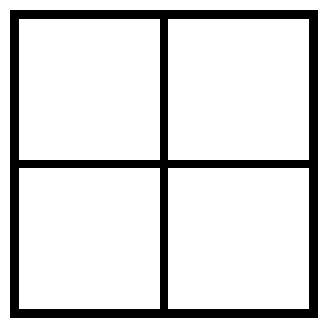

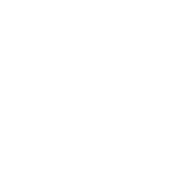

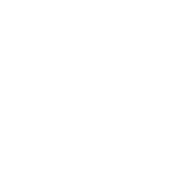

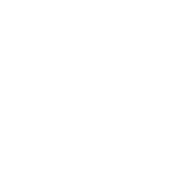

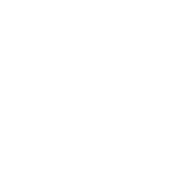

In [ ]:
# from generators.ncsn_sampler import nscn_sampler

model.eval()
device = next(model.parameters()).device

config = {
    "sigma_min": 0.01,  # Small enough to capture fine details
    "sigma_max": 1,  # Large enough to cover the data distribution diameter
    "L": 10,  # Max time horizon
    "num_eval_images": 4,
    "batch_size": 4,
    "n_steps_per_sigma": 100,  # Higher steps = better quality but slower
    "step_size_factor": 0.00002,
}



fake_images = nscn_sampler(model, config, device)
images = fake_images
print(images)
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i].cpu()
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()


# Diffusion

In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-diffusion",
    # "run_id": "5daa3db2",

    # Training Hyperparameters
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 25.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": False,
    "total": 4,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 500,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": False,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

/content/cifar10-score-diffusion/utils/diffusion_utils.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.
/content/cifar10-score-diffusion/utils/diffusion_utils.py:24: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.


Current run id:  d10b7046


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training from epoch  0
Starting epoch  0
Average Loss: 609.103344
Starting epoch  1
Average Loss: 182.435875
Starting epoch  2
Average Loss: 156.854259
Starting epoch  3
Average Loss: 149.011194
Starting epoch  4
Average Loss: 144.713882
Starting epoch  5
Average Loss: 137.204617
Starting epoch  6
Average Loss: 133.205692
Starting epoch  7
Average Loss: 131.292872
Starting epoch  8
Average Loss: 127.531875
Starting epoch  9
Average Loss: 127.790579
Starting epoch  10
Average Loss: 121.435907
Starting epoch  11
Average Loss: 123.164301
Starting epoch  12
Average Loss: 120.232390
Starting epoch  13
Average Loss: 120.184329
Starting epoch  14
Average Loss: 119.638731
Starting epoch  15
Average Loss: 115.714828
Starting epoch  16
Average Loss: 117.633464
Starting epoch  17
Average Loss: 115.129405
Starting epoch  18
Average Loss: 114.520087
Starting epoch  19
Average Loss: 115.530052
Starting epoch  20
Average Loss: 113.598104
Starting epoch  21
Average Loss: 114.551207
Starting e

In [ ]:
import numpy as np
import torch

from utils.diffusion_utils import marginal_prob_std, diffusion_coeff


def sde_sampler(score_model, config,
                eps=1e-3):
    """Generate samples from score-based models with Predictor-Corrector method.

    Args:
      score_model: A PyTorch model that represents the time-dependent score-based model.
      num_steps: The number of sampling steps.
        Equivalent to the number of discretized time steps.
      device: 'cuda' for running on GPUs, and 'cpu' for running on CPUs.
      eps: The smallest time step for numerical stability.

    Returns:
      Samples.
    """
    batch_size = config.get("batch_size", 128)
    num_steps = config.get("num_steps", 500)
    device = config.get("device", 'cuda')
    snr = config.get("snr", 0.16)
    sigma = config.get("sigma", 25.0)

    t = torch.ones(batch_size, device=device)
    init_x = torch.randn(batch_size, 3, 32, 32, device=device) * marginal_prob_std(t, sigma)[:, None, None, None]
    time_steps = np.linspace(1., eps, num_steps)
    step_size = time_steps[0] - time_steps[1]
    x = init_x
    with torch.no_grad():
        for time_step in time_steps:
            batch_time_step = torch.ones(batch_size, device=device) * time_step

            grad = score_model(x, batch_time_step)
            grad_norm = torch.norm(grad.reshape(grad.shape[0], -1), dim=-1).mean()
            grad_norm = grad_norm.clamp(min=1e-10) #OPTIONAL
            noise_norm = np.sqrt(np.prod(x.shape[1:]))
            langevin_step_size = 2 * (snr * noise_norm / grad_norm) ** 2
            x = x + langevin_step_size * grad + torch.sqrt(2 * langevin_step_size) * torch.randn_like(x)

            g = diffusion_coeff(batch_time_step, sigma, device)
            x_mean = x + (g ** 2)[:, None, None, None] * score_model(x, batch_time_step) * step_size
            x = x_mean + torch.sqrt(g ** 2 * step_size)[:, None, None, None] * torch.randn_like(x)

        return x_mean


def sample_many_dsm(score_model, config):
    total = config.get("total", 100)
    cur_total = 0
    batch_size = config.get("batch_size", 128)

    fake_images = []

    while cur_total < total:
        cur_batch_size = min(batch_size, total - cur_total)
        config["batch_size"] = cur_batch_size
        cur_total += cur_batch_size

        fake_images.append(sde_sampler(score_model, config))
    config["batch_size"] = batch_size
    return torch.concat(fake_images)

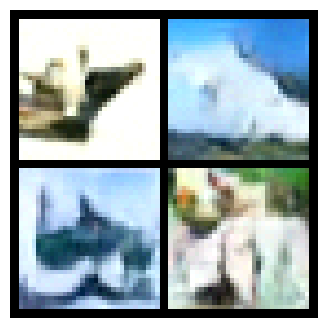

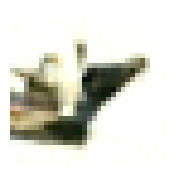

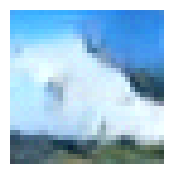

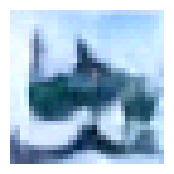

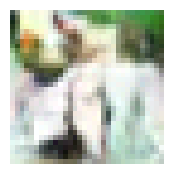

In [ ]:
# from generators.sde_sampler import sample_many_dsm

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma" : 25.0,
    "total": 4,
    "num_steps": 500,
    "snr": 0.16,
}



fake_images = sample_many_dsm(model, config)
images = (fake_images + 1) / 2.0  # [-1,1] -> [0,1]
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = (images[i] + 1) / 2
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-diffusion",
    "run_id": "d10b7046",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 25.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

Current run id:  d10b7046


epoch/epoch,199
epoch/loss,101.84171
metrics/fid_test,76.70739
metrics/fid_train,75.39795
metrics/is_test_mean,3.98072
metrics/is_test_std,0.06927
metrics/is_train_mean,3.98072
metrics/is_train_std,0.06927


Starting training from epoch  200
Generating fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating

FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Train: {'FID': 61.17404587906016, 'IS_MEAN': 4.135470390319824, 'IS_STD': 0.08560655266046524}
Test: {'FID': 62.516995030265264, 'IS_MEAN': 4.135470390319824, 'IS_STD': 0.08560655266046524}


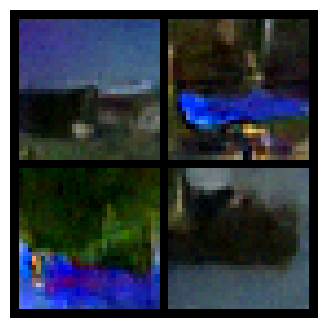

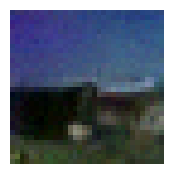

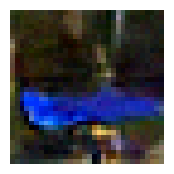

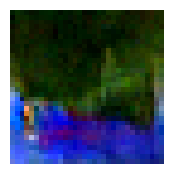

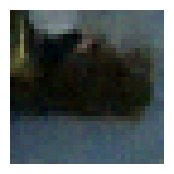

In [ ]:
# from generators.sde_sampler import sample_many_dsm

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma" : 25.0,
    "total": 4,
    "num_steps": 10000,
    "snr": 0.16,
}



fake_images = sample_many_dsm(model, config)
images = (fake_images + 1) / 2.0
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()


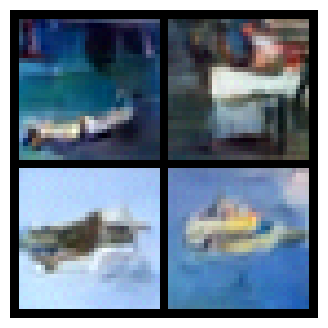

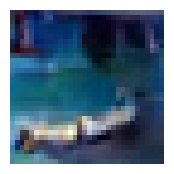

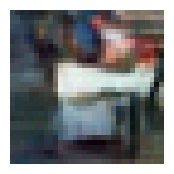

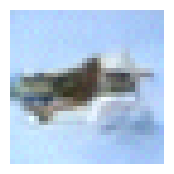

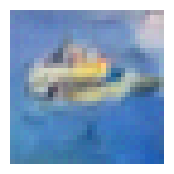

In [ ]:
# from generators.sde_sampler import sample_many_dsm

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma" : 25.0,
    "total": 4,
    "num_steps": 500,
    "snr": 0.09,
}



fake_images = sample_many_dsm(model, config)
images = (fake_images + 1) / 2.0
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v1-diffusion",
    "run_id": "d10b7046",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 25.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 500,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

/content/cifar10-score-diffusion/utils/diffusion_utils.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.
/content/cifar10-score-diffusion/utils/diffusion_utils.py:24: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.


Current run id:  d10b7046


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training from epoch  200
Generating fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating

100%|██████████| 104M/104M [00:00<00:00, 199MB/s] 
FID/IS Progress: 100%|██████████| 79/79 [00:36<00:00,  2.17it/s]


Train: {'FID': 72.35292735405595, 'IS_MEAN': 3.9261698722839355, 'IS_STD': 0.11083171516656876}
Test: {'FID': 73.73219434819171, 'IS_MEAN': 3.9261698722839355, 'IS_STD': 0.11083171516656876}


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v2-diffusion-low-sigma",
    "run_id": "6c383157",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 10.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

/content/cifar10-score-diffusion/utils/diffusion_utils.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.
/content/cifar10-score-diffusion/utils/diffusion_utils.py:24: SyntaxWarning: invalid escape sequence '\s'
  sigma: The $\sigma$ in our SDE.


Current run id:  6c383157


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: zhorzholianimate (MLBeasts) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training from epoch  200
Generating fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating

100%|██████████| 104M/104M [00:00<00:00, 220MB/s] 
FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.13it/s]


Train: {'FID': 115.1014367477162, 'IS_MEAN': 2.955000400543213, 'IS_STD': 0.04920260235667229}
Test: {'FID': 115.90117676084938, 'IS_MEAN': 2.955000400543213, 'IS_STD': 0.04920260235667229}


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v2-diffusion-low-sigma",
    # "run_id": "6c383157",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 50.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    # "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

Current run id:  640382e4


metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,199
epoch/loss,118.62131
metrics/fid_test,115.90118
metrics/fid_train,115.10144
metrics/is_test_mean,2.955


Starting training from epoch  0
Starting epoch  0
Average Loss: 595.228524
Starting epoch  1
Average Loss: 188.698774
Starting epoch  2
Average Loss: 154.303874
Starting epoch  3
Average Loss: 139.272551
Starting epoch  4
Average Loss: 132.319004
Starting epoch  5
Average Loss: 126.962597
Starting epoch  6
Average Loss: 121.985505
Starting epoch  7
Average Loss: 118.592113
Starting epoch  8
Average Loss: 115.272974
Starting epoch  9
Average Loss: 114.301693
Starting epoch  10
Average Loss: 109.272360
Starting epoch  11
Average Loss: 109.696213
Starting epoch  12
Average Loss: 108.802171
Starting epoch  13
Average Loss: 106.408594
Starting epoch  14
Average Loss: 105.910423
Starting epoch  15
Average Loss: 103.154079
Starting epoch  16
Average Loss: 104.355959
Starting epoch  17
Average Loss: 102.924407
Starting epoch  18
Average Loss: 103.850423
Starting epoch  19
Average Loss: 102.230896
Starting epoch  20
Average Loss: 102.785250
Starting epoch  21
Average Loss: 102.459689
Starting e

FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Train: {'FID': 57.63357812326096, 'IS_MEAN': 4.409364223480225, 'IS_STD': 0.08882657438516617}
Test: {'FID': 58.88916984962437, 'IS_MEAN': 4.409364223480225, 'IS_STD': 0.08882657438516617}


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v2-diffusion-low-sigma",
    "run_id": "640382e4",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 50.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

Current run id:  640382e4


epoch/epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇██
epoch/loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
metrics/fid_test,▁
metrics/fid_train,▁
metrics/is_test_mean,▁
metrics/is_test_std,▁
metrics/is_train_mean,▁
metrics/is_train_std,▁
epoch/epoch,199
epoch/loss,92.89043
metrics/fid_test,58.88917


Starting training from epoch  200
Generating fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating 128 fake images...
Generating

FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Train: {'FID': 57.43654621210005, 'IS_MEAN': 4.445940017700195, 'IS_STD': 0.12588617205619812}
Test: {'FID': 58.71505137116833, 'IS_MEAN': 4.445940017700195, 'IS_STD': 0.12588617205619812}


Generating 4 fake images...


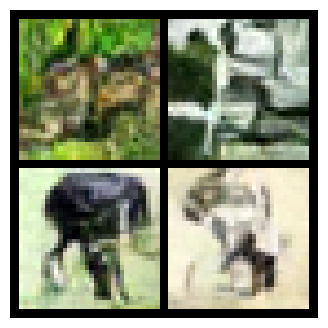

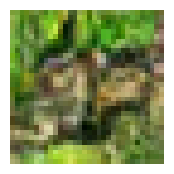

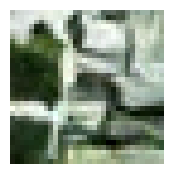

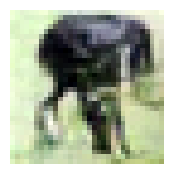

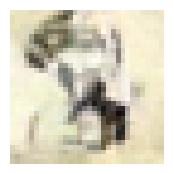

In [ ]:
from generators.sde_sampler import sample_many_dsm

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma" : 50.0,
    "total": 4,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,
}



fake_images = sample_many_dsm(model, config)
images = (fake_images + 1) / 2.0
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()


Generating 4 fake images...


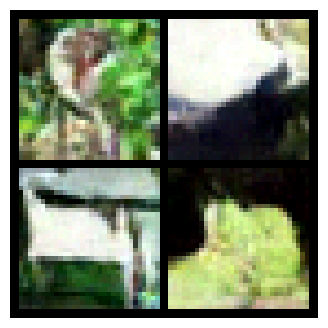

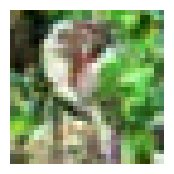

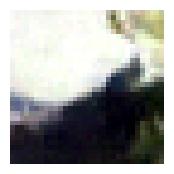

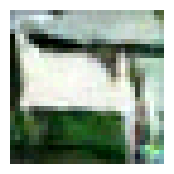

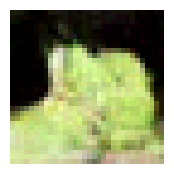

In [ ]:
from generators.sde_sampler import sample_many_dsm

model.eval()
device = next(model.parameters()).device

config = {
    "batch_size": 4,           # Matches your num_eval_images
    "sigma" : 50.0,
    "total": 4,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 2000,  # Higher steps = better quality but slower
    "snr": 0.16,
}



fake_images = sample_many_dsm(model, config)
images = (fake_images + 1) / 2.0
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()


In [ ]:

config = {
    # Metadata
    "run_name": "dsm-cifar10-ve-v5-diffusion-very-high",
    "run_id": "730aad45",

    # Training Hyperparameters
    "epochs": 200,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,

    "sigma" : 65.0,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 1000,  # Higher steps = better quality but slower
    "snr": 0.16,

    # Checkpointing
    "save_every": 1,
    "resume_training": True,

    #Model
    "device" : "cuda",
}

from train import train_sde
model = train_sde.train_sde(config)

Current run id:  730aad45


Starting training from epoch  51
Starting epoch  51
Average Loss: 94.219176
Starting epoch  52
Average Loss: 94.875422
Starting epoch  53
Average Loss: 94.433397
Starting epoch  54
Average Loss: 92.938232
Starting epoch  55
Average Loss: 93.437907
Starting epoch  56
Average Loss: 93.016456
Starting epoch  57
Average Loss: 93.371809
Starting epoch  58
Average Loss: 93.923368
Starting epoch  59
Average Loss: 94.065462
Starting epoch  60
Average Loss: 91.717556
Starting epoch  61
Average Loss: 92.957726
Starting epoch  62
Average Loss: 93.854854
Starting epoch  63
Average Loss: 92.402033
Starting epoch  64
Average Loss: 92.140367
Starting epoch  65
Average Loss: 92.857664
Starting epoch  66
Average Loss: 92.373242
Starting epoch  67
Average Loss: 92.058557
Starting epoch  68
Average Loss: 93.148222
Starting epoch  69
Average Loss: 92.250963
Starting epoch  70
Average Loss: 91.747142
Starting epoch  71
Average Loss: 92.023719
Starting epoch  72
Average Loss: 90.524927
Starting epoch  73
Av

100%|██████████| 104M/104M [00:00<00:00, 173MB/s]
FID/IS Progress: 100%|██████████| 79/79 [00:37<00:00,  2.12it/s]


Train: {'FID': 74.30022540559307, 'IS_MEAN': 4.112511157989502, 'IS_STD': 0.07332311570644379}
Test: {'FID': 75.67676476600889, 'IS_MEAN': 4.112511157989502, 'IS_STD': 0.07332311570644379}


# NCSN Training

In [6]:

config = {
    # Metadata
    "run_name": "ncsn2-v1-default",
    "run_id": "fefd069c",
    "resume_training": True,

    #Training Params
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,
    "device" : "cuda",

    #Noise Params
    "sigma_max": 1,
    "sigma_min": 0.01,
    "L": 10,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": False,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 100,  # Higher steps = better quality but slower
    "eps": 1e-5,

    # Checkpointing
    "save_every": 1,
    "resume_training": False,

    #Model
    "device" : "cuda",
}

from train import train_ncsn2
model = train_ncsn2.train_ncsn(config)

Current run id:  fefd069c


epoch/epoch,91
epoch/loss,0.14042


Starting training from epoch  0
Epoch 0


100%|██████████| 391/391 [00:33<00:00, 11.79it/s]


Epoch loss: 0.43962442653868206
Epoch 1


100%|██████████| 391/391 [00:33<00:00, 11.58it/s]


Epoch loss: 0.2356592341685844
Epoch 2


100%|██████████| 391/391 [00:34<00:00, 11.42it/s]


Epoch loss: 0.2059809972944162
Epoch 3


100%|██████████| 391/391 [00:33<00:00, 11.59it/s]


Epoch loss: 0.19443122326108195
Epoch 4


100%|██████████| 391/391 [00:33<00:00, 11.52it/s]


Epoch loss: 0.1825666426850097
Epoch 5


100%|██████████| 391/391 [00:33<00:00, 11.53it/s]


Epoch loss: 0.16979037328144472
Epoch 6


100%|██████████| 391/391 [00:34<00:00, 11.49it/s]


Epoch loss: 0.16419467408105234
Epoch 7


100%|██████████| 391/391 [00:33<00:00, 11.58it/s]


Epoch loss: 0.16053488000731944
Epoch 8


100%|██████████| 391/391 [00:34<00:00, 11.44it/s]


Epoch loss: 0.15708748117813368
Epoch 9


100%|██████████| 391/391 [00:33<00:00, 11.62it/s]


Epoch loss: 0.15664469338286563
Epoch 10


100%|██████████| 391/391 [00:34<00:00, 11.50it/s]


Epoch loss: 0.1556350749052699
Epoch 11


100%|██████████| 391/391 [00:33<00:00, 11.53it/s]


Epoch loss: 0.15552398825393005
Epoch 12


100%|██████████| 391/391 [00:34<00:00, 11.38it/s]


Epoch loss: 0.15582935986540203
Epoch 13


100%|██████████| 391/391 [00:34<00:00, 11.36it/s]


Epoch loss: 0.15150255784201805
Epoch 14


100%|██████████| 391/391 [00:34<00:00, 11.29it/s]


Epoch loss: 0.1528173220317687
Epoch 15


100%|██████████| 391/391 [00:33<00:00, 11.56it/s]


Epoch loss: 0.15125541276562854
Epoch 16


100%|██████████| 391/391 [00:34<00:00, 11.46it/s]


Epoch loss: 0.15031042468288672
Epoch 17


100%|██████████| 391/391 [00:34<00:00, 11.49it/s]


Epoch loss: 0.14960578649931247
Epoch 18


100%|██████████| 391/391 [00:34<00:00, 11.40it/s]


Epoch loss: 0.14860318300059383
Epoch 19


100%|██████████| 391/391 [00:34<00:00, 11.35it/s]


Epoch loss: 0.14845350318019043
Epoch 20


100%|██████████| 391/391 [00:34<00:00, 11.42it/s]


Epoch loss: 0.1491340986069511
Epoch 21


100%|██████████| 391/391 [00:34<00:00, 11.37it/s]


Epoch loss: 0.14888496775075297
Epoch 22


100%|██████████| 391/391 [00:34<00:00, 11.27it/s]


Epoch loss: 0.1494123383098856
Epoch 23


100%|██████████| 391/391 [00:34<00:00, 11.24it/s]


Epoch loss: 0.14694802870835794
Epoch 24


100%|██████████| 391/391 [00:34<00:00, 11.42it/s]


Epoch loss: 0.14626842518063152
Epoch 25


100%|██████████| 391/391 [00:34<00:00, 11.43it/s]


Epoch loss: 0.14722780229719093
Epoch 26


100%|██████████| 391/391 [00:34<00:00, 11.35it/s]


Epoch loss: 0.14800353757941814
Epoch 27


100%|██████████| 391/391 [00:34<00:00, 11.35it/s]


Epoch loss: 0.14676740275853126
Epoch 28


100%|██████████| 391/391 [00:34<00:00, 11.35it/s]


Epoch loss: 0.14609445492401146
Epoch 29


100%|██████████| 391/391 [00:34<00:00, 11.36it/s]


Epoch loss: 0.14623681777883368
Epoch 30


100%|██████████| 391/391 [00:34<00:00, 11.23it/s]


Epoch loss: 0.14647814612406904
Epoch 31


100%|██████████| 391/391 [00:34<00:00, 11.35it/s]


Epoch loss: 0.1453479348546099
Epoch 32


100%|██████████| 391/391 [00:34<00:00, 11.37it/s]


Epoch loss: 0.14603827005761968
Epoch 33


100%|██████████| 391/391 [00:34<00:00, 11.39it/s]


Epoch loss: 0.14627408771716116
Epoch 34


100%|██████████| 391/391 [00:34<00:00, 11.45it/s]


Epoch loss: 0.14448455109468203
Epoch 35


100%|██████████| 391/391 [00:34<00:00, 11.39it/s]


Epoch loss: 0.14546735659051124
Epoch 36


100%|██████████| 391/391 [00:34<00:00, 11.45it/s]


Epoch loss: 0.14593652837797808
Epoch 37


100%|██████████| 391/391 [00:34<00:00, 11.31it/s]


Epoch loss: 0.14603895282425233
Epoch 38


100%|██████████| 391/391 [00:34<00:00, 11.41it/s]


Epoch loss: 0.14568455736426747
Epoch 39


100%|██████████| 391/391 [00:34<00:00, 11.33it/s]


Epoch loss: 0.14530944873762253
Epoch 40


100%|██████████| 391/391 [00:34<00:00, 11.49it/s]


Epoch loss: 0.1445283211405625
Epoch 41


100%|██████████| 391/391 [00:34<00:00, 11.39it/s]


Epoch loss: 0.14486368537863806
Epoch 42


100%|██████████| 391/391 [00:34<00:00, 11.34it/s]


Epoch loss: 0.14529187756273754
Epoch 43


100%|██████████| 391/391 [00:34<00:00, 11.46it/s]


Epoch loss: 0.1443331290579513
Epoch 44


100%|██████████| 391/391 [00:34<00:00, 11.34it/s]


Epoch loss: 0.14428067557951985
Epoch 45


100%|██████████| 391/391 [00:34<00:00, 11.38it/s]


Epoch loss: 0.14412233401137545
Epoch 46


100%|██████████| 391/391 [00:35<00:00, 11.06it/s]


Epoch loss: 0.1433136466214114
Epoch 47


100%|██████████| 391/391 [00:35<00:00, 11.12it/s]


Epoch loss: 0.14346797444174053
Epoch 48


100%|██████████| 391/391 [00:34<00:00, 11.32it/s]


Epoch loss: 0.1425449979465331
Epoch 49


100%|██████████| 391/391 [00:34<00:00, 11.20it/s]


Epoch loss: 0.14353909345386584
Epoch 50


100%|██████████| 391/391 [00:34<00:00, 11.25it/s]


Epoch loss: 0.14221071695808865
Epoch 51


100%|██████████| 391/391 [00:35<00:00, 11.13it/s]


Epoch loss: 0.1431291676543253
Epoch 52


100%|██████████| 391/391 [00:35<00:00, 11.17it/s]


Epoch loss: 0.1436296510879341
Epoch 53


100%|██████████| 391/391 [00:34<00:00, 11.24it/s]


Epoch loss: 0.14144918431177775
Epoch 54


100%|██████████| 391/391 [00:34<00:00, 11.28it/s]


Epoch loss: 0.1424173626029278
Epoch 55


100%|██████████| 391/391 [00:33<00:00, 11.51it/s]


Epoch loss: 0.14284514003168897
Epoch 56


100%|██████████| 391/391 [00:34<00:00, 11.32it/s]


Epoch loss: 0.1423549991282051
Epoch 57


100%|██████████| 391/391 [00:34<00:00, 11.50it/s]


Epoch loss: 0.14326016099937736
Epoch 58


100%|██████████| 391/391 [00:34<00:00, 11.41it/s]


Epoch loss: 0.14202993988152354
Epoch 59


100%|██████████| 391/391 [00:34<00:00, 11.42it/s]


Epoch loss: 0.14233222544726815
Epoch 60


100%|██████████| 391/391 [00:34<00:00, 11.44it/s]


Epoch loss: 0.14278677629921444
Epoch 61


100%|██████████| 391/391 [00:34<00:00, 11.44it/s]


Epoch loss: 0.14103123717143407
Epoch 62


100%|██████████| 391/391 [00:33<00:00, 11.51it/s]


Epoch loss: 0.14187786810081024
Epoch 63


100%|██████████| 391/391 [00:34<00:00, 11.39it/s]


Epoch loss: 0.14052251852153208
Epoch 64


100%|██████████| 391/391 [00:34<00:00, 11.46it/s]


Epoch loss: 0.1393018073171301
Epoch 65


100%|██████████| 391/391 [00:34<00:00, 11.37it/s]


Epoch loss: 0.14154920081043487
Epoch 66


100%|██████████| 391/391 [00:33<00:00, 11.53it/s]


Epoch loss: 0.14204584776669207
Epoch 67


100%|██████████| 391/391 [00:34<00:00, 11.45it/s]


Epoch loss: 0.14100283268086442
Epoch 68


100%|██████████| 391/391 [00:33<00:00, 11.55it/s]


Epoch loss: 0.14232151423726241
Epoch 69


100%|██████████| 391/391 [00:33<00:00, 11.52it/s]


Epoch loss: 0.13891050164275767
Epoch 70


100%|██████████| 391/391 [00:34<00:00, 11.43it/s]


Epoch loss: 0.14126185910857242
Epoch 71


100%|██████████| 391/391 [00:34<00:00, 11.43it/s]


Epoch loss: 0.1406891624374158
Epoch 72


100%|██████████| 391/391 [00:34<00:00, 11.47it/s]


Epoch loss: 0.140807172431208
Epoch 73


100%|██████████| 391/391 [00:34<00:00, 11.47it/s]


Epoch loss: 0.14096673221691794
Epoch 74


100%|██████████| 391/391 [00:34<00:00, 11.37it/s]


Epoch loss: 0.13924891850375154
Epoch 75


100%|██████████| 391/391 [00:34<00:00, 11.47it/s]


Epoch loss: 0.1406119608360788
Epoch 76


100%|██████████| 391/391 [00:34<00:00, 11.40it/s]


Epoch loss: 0.13978199350178394
Epoch 77


100%|██████████| 391/391 [00:34<00:00, 11.49it/s]


Epoch loss: 0.14195987751797948
Epoch 78


100%|██████████| 391/391 [00:34<00:00, 11.46it/s]


Epoch loss: 0.14243184026244962
Epoch 79


100%|██████████| 391/391 [00:34<00:00, 11.42it/s]


Epoch loss: 0.1400663555811738
Epoch 80


100%|██████████| 391/391 [00:34<00:00, 11.50it/s]


Epoch loss: 0.1403506847141344
Epoch 81


100%|██████████| 391/391 [00:34<00:00, 11.41it/s]


Epoch loss: 0.1418006079238089
Epoch 82


100%|██████████| 391/391 [00:33<00:00, 11.53it/s]


Epoch loss: 0.13897187967815666
Epoch 83


100%|██████████| 391/391 [00:34<00:00, 11.41it/s]


Epoch loss: 0.1398481595356141
Epoch 84


100%|██████████| 391/391 [00:33<00:00, 11.60it/s]


Epoch loss: 0.14102485164275866
Epoch 85


100%|██████████| 391/391 [00:34<00:00, 11.43it/s]


Epoch loss: 0.13951615428985537
Epoch 86


100%|██████████| 391/391 [00:33<00:00, 11.57it/s]


Epoch loss: 0.13997022927645833
Epoch 87


100%|██████████| 391/391 [00:33<00:00, 11.53it/s]


Epoch loss: 0.13921218796078202
Epoch 88


100%|██████████| 391/391 [00:33<00:00, 11.55it/s]


Epoch loss: 0.1380559721261339
Epoch 89


100%|██████████| 391/391 [00:33<00:00, 11.54it/s]


Epoch loss: 0.13925826522852758
Epoch 90


100%|██████████| 391/391 [00:34<00:00, 11.50it/s]


Epoch loss: 0.13941796674676563
Epoch 91


100%|██████████| 391/391 [00:33<00:00, 11.64it/s]


Epoch loss: 0.13994844844731527
Epoch 92


100%|██████████| 391/391 [00:33<00:00, 11.52it/s]


Epoch loss: 0.14016388512938224
Epoch 93


100%|██████████| 391/391 [00:33<00:00, 11.56it/s]


Epoch loss: 0.13842529067984016
Epoch 94


100%|██████████| 391/391 [00:34<00:00, 11.40it/s]


Epoch loss: 0.14120012940958027
Epoch 95


100%|██████████| 391/391 [00:33<00:00, 11.64it/s]


Epoch loss: 0.13812227143198633
Epoch 96


100%|██████████| 391/391 [00:33<00:00, 11.61it/s]


Epoch loss: 0.14103430534339012
Epoch 97


100%|██████████| 391/391 [00:33<00:00, 11.74it/s]


Epoch loss: 0.13891662224708007
Epoch 98


100%|██████████| 391/391 [00:33<00:00, 11.67it/s]


Epoch loss: 0.13801349870993962
Epoch 99


100%|██████████| 391/391 [00:34<00:00, 11.45it/s]


Epoch loss: 0.13994843739530313


In [ ]:

config = {
    # Metadata
    "run_name": "ncsn2-v1-default",
    "run_id": "fefd069c",
    "resume_training": True,

    #Training Params
    "epochs": 100,  # Score models need many epochs (often 100-500+)
    "lr": 0.001,  # Adam works best with a lower LR for UNets
    "batch_size": 128,
    "device" : "cuda",

    #Noise Params
    "sigma_max": 1,
    "sigma_min": 0.01,
    "L": 10,

    # Sampling / Evaluation (Langevin Dynamics)
    "eval": True,
    "total": 10000,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 100,  # Higher steps = better quality but slower
    "eps": 1e-5,

    # Checkpointing
    "save_every": 1,

    #Model
    "device" : "cuda",
}

from train import train_ncsn2
model = train_ncsn2.train_ncsn(config)

Current run id:  fefd069c


epoch/epoch,99
epoch/loss,0.13995


Starting training from epoch  100
Generating fake images...
Generating 128 fake images...


 60%|██████    | 6/10 [00:12<00:08,  2.02s/it]

Generating 4 fake images...


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]


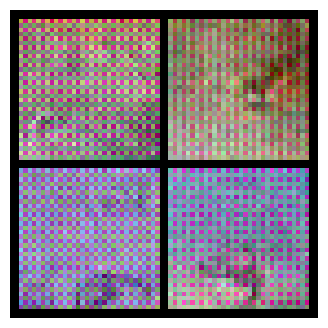

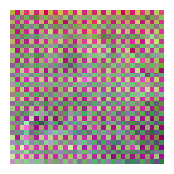

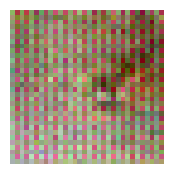

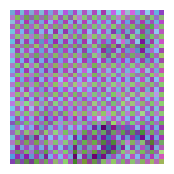

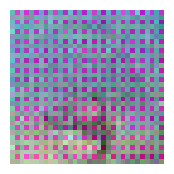

In [14]:
from generators.ncsn_sampler_v2 import sample_many_ncsn

model.eval()
device = next(model.parameters()).device

config = {
    "sigma_max": 1,
    "sigma_min": 0.01,
    "L": 10,
    "batch_size": 4,
    "total": 4,  # Start small to save time, increase to 10k/50k for final FID
    "num_steps": 100,  # Higher steps = better quality but slower
    "eps": 1e-5,
    "device" : "cuda",
}



fake_images = sample_many_ncsn(model, config)
images = (fake_images + 1) / 2.0  # [-1,1] -> [0,1]
import matplotlib.pyplot as plt
import torchvision
grid_img = torchvision.utils.make_grid(images, nrow=2)  # 2x2 grid
plt.figure(figsize=(4,4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())  # CHW -> HWC
plt.axis('off')
plt.show()
for i in range(fake_images.size(0)):
    img = images[i]
    plt.figure(figsize=(2,2))
    plt.imshow(img.permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()